# Install dependencies and set up Socrata API

In [4]:
!pip install sodapy;
!pip install nbconvert;
import numpy as np
import pandas as pd
import sodapy
from sodapy import Socrata
import matplotlib.pyplot as plt
from datetime import datetime
client = Socrata("data.cdc.gov", None)

# COVID-19 Total 7-day Admissions per 100k

In [5]:
results = client.get("7dk4-g6vg", limit = 100000)

In [6]:
full_data=pd.DataFrame.from_records(results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(11847, 12)
week_ending_date                   object
state                              object
avg_adm_all_covid_confirmed        object
pct_chg_avg_adm_all_covid          object
total_adm_all_covid_confirmed      object
total_adm_all_covid_confirmed_1    object
sum_adm_all_covid_confirmed        object
avg_total_patients                 object
avg_percent_inpatient_beds         object
abs_chg_avg_percent_inpatient      object
avg_percent_staff_icu_beds         object
abs_chg_avg_percent_staff          object
dtype: object


Index(['week_ending_date', 'state', 'avg_adm_all_covid_confirmed',
       'pct_chg_avg_adm_all_covid', 'total_adm_all_covid_confirmed',
       'total_adm_all_covid_confirmed_1', 'sum_adm_all_covid_confirmed',
       'avg_total_patients', 'avg_percent_inpatient_beds',
       'abs_chg_avg_percent_inpatient', 'avg_percent_staff_icu_beds',
       'abs_chg_avg_percent_staff'],
      dtype='object')

In [7]:
full_data=full_data.rename({
                 'state':'geo_location',
                 'avg_adm_all_covid_confirmed':'new_adm_7day_avg',
                 'total_adm_all_covid_confirmed':'new_adm_7day_total',
                 'total_adm_all_covid_confirmed_1':'new_adm_7day_total_per100k',
                 'avg_percent_inpatient_beds':'inpatient_bed_occ_7day_avg',
                 'avg_percent_staff_icu_beds':'icu_bed_occ_7day_avg'},axis=1).astype({
                 'new_adm_7day_avg':'float64',
                 'new_adm_7day_total':'float64',
                 'new_adm_7day_total_per100k':'float64',
                 'inpatient_bed_occ_7day_avg':'float64',
                 'icu_bed_occ_7day_avg':'float64'},errors = 'raise')[['week_ending_date','geo_location','new_adm_7day_total_per100k','inpatient_bed_occ_7day_avg','icu_bed_occ_7day_avg']]

In [8]:
full_data['week']=pd.to_datetime(full_data['week_ending_date'])
full_data=full_data.set_index(['week']).drop(columns=['week_ending_date','inpatient_bed_occ_7day_avg','icu_bed_occ_7day_avg'])

In [9]:
case_data=full_data.pivot(columns='geo_location',values = 'new_adm_7day_total_per100k')

In [10]:
#case_data.to_csv('/drive/MyDrive/Documents/latest_covid_adm_data.csv')

In [11]:
us_data=case_data['USA']
us_data.name='New_COVID_7DayADM_rate'
us_data.head()

week
2020-08-08    9.524743
2020-08-15    8.996444
2020-08-22    8.862412
2020-08-29    8.491940
2020-09-05    7.970267
Name: New_COVID_7DayADM_rate, dtype: float64

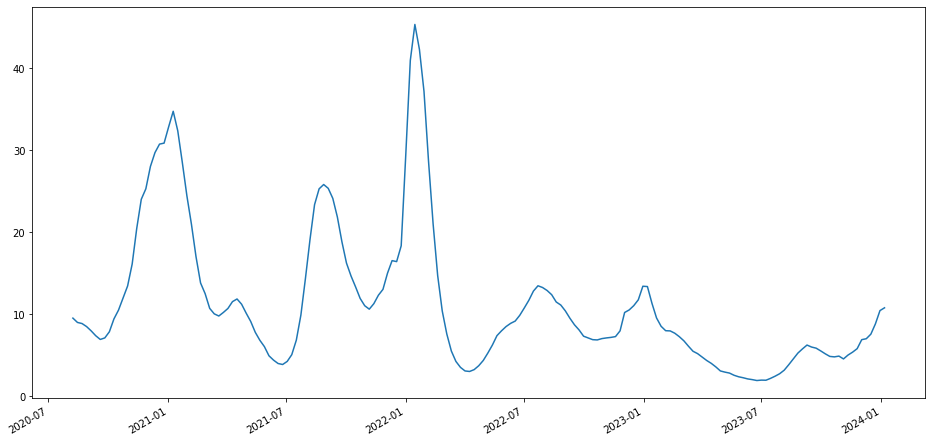

In [12]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(us_data)
fig.autofmt_xdate()

# NSSP ER Visits- COVID, Flu, RSV, Combined percentage of all ER Visits

In [13]:
er_visit_results=client.get('vutn-jzwm', limit = 20000)

In [14]:
full_data=pd.DataFrame.from_records(er_visit_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(9984, 4)
week_end          object
pathogen          object
geography         object
percent_visits    object
dtype: object


Index(['week_end', 'pathogen', 'geography', 'percent_visits'], dtype='object')

In [15]:
full_data=full_data.astype({'percent_visits': 'float64'})

In [16]:
full_data['week']=pd.to_datetime(full_data['week_end'])

In [17]:
rate_data=full_data.loc[(full_data['geography']=='United States')].drop(columns = ['week_end','geography']).set_index(['week'])

In [18]:
er_adm_data= rate_data.pivot(columns = 'pathogen', values='percent_visits')
er_adm_data.head()

pathogen,COVID-19,Combined,Influenza,RSV
week,,,,
2023-01-14,2.6,3.8,1.0,0.2
2023-01-21,2.3,3.2,0.7,0.2
2023-01-28,2.1,2.8,0.6,0.1
2023-02-04,2.1,2.6,0.5,0.1
2023-02-11,2.0,2.4,0.4,0.1


In [19]:
#er_adm_data.to_csv('/drive/MyDrive/Documents/latest_er_adm_data.csv')

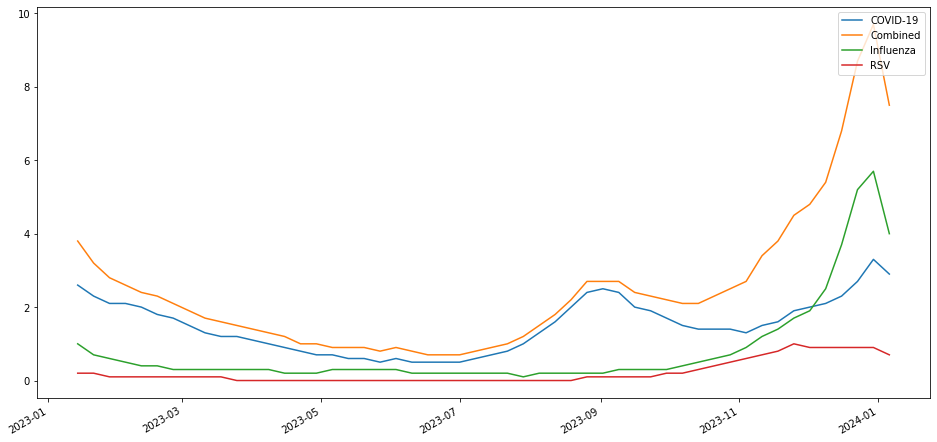

In [20]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(er_adm_data)
fig.autofmt_xdate()
plt.legend(['COVID-19','Combined','Influenza','RSV'], loc='upper right')

# Lab-Confirmed Hospitalizations of the Big Three (Rate per 100k)

In [21]:
lab_results = client.get("kvib-3txy", limit = 100000)

In [22]:
full_data=pd.DataFrame.from_records(lab_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(32810, 11)
surveillance_network    object
season                  object
mmwr_year               object
mmwr_week               object
age_group               object
sex                     object
race_ethnicity          object
site                    object
weekly_rate             object
cumulative_rate         object
_weekenddate            object
dtype: object


Index(['surveillance_network', 'season', 'mmwr_year', 'mmwr_week', 'age_group',
       'sex', 'race_ethnicity', 'site', 'weekly_rate', 'cumulative_rate',
       '_weekenddate'],
      dtype='object')

In [23]:
full_data.head()

,surveillance_network,season,mmwr_year,mmwr_week,age_group,sex,race_ethnicity,site,weekly_rate,cumulative_rate,_weekenddate
0,FluSurv-NET,2018-19,2018,40,Overall,Overall,"AI/AN, non-Hispanic",Overall,0,0,2018-10-06T00:00:00.000
1,FluSurv-NET,2018-19,2018,41,Overall,Overall,"AI/AN, non-Hispanic",Overall,0,0,2018-10-13T00:00:00.000
2,FluSurv-NET,2018-19,2018,42,Overall,Overall,"AI/AN, non-Hispanic",Overall,0,0,2018-10-20T00:00:00.000
3,FluSurv-NET,2018-19,2018,43,Overall,Overall,"AI/AN, non-Hispanic",Overall,0,0,2018-10-27T00:00:00.000
4,FluSurv-NET,2018-19,2018,44,Overall,Overall,"AI/AN, non-Hispanic",Overall,0,0,2018-11-03T00:00:00.000


In [24]:
filtered_data = full_data.loc[(full_data['race_ethnicity'] == 'Overall') & (full_data['age_group'] == 'Overall') & (full_data['sex'] == 'Overall') & (full_data['site'] == 'Overall')][['surveillance_network','weekly_rate','_weekenddate']]

In [25]:
filtered_data= filtered_data.astype({'weekly_rate' : 'float64'})
filtered_data['week']=pd.to_datetime(filtered_data['_weekenddate'])

In [26]:
rate_data= filtered_data.drop(columns = '_weekenddate').set_index('week').pivot(columns = 'surveillance_network', values='weekly_rate')
rate_data.head()

surveillance_network,COVID-NET,Combined,FluSurv-NET,RSV-NET
week,,,,
2018-10-06,NaN,0.2,0.1,0.1
2018-10-13,NaN,0.3,0.1,0.2
2018-10-20,NaN,0.3,0.1,0.2
2018-10-27,NaN,0.4,0.1,0.3
2018-11-03,NaN,0.5,0.2,0.3


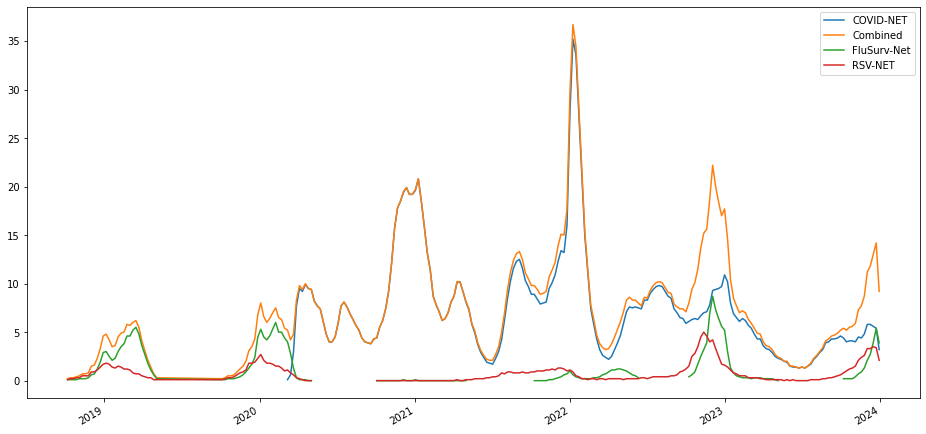

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(rate_data)
fig.autofmt_xdate()
plt.legend(['COVID-NET','Combined','FluSurv-Net', 'RSV-NET'], loc='upper right')

# Percent of Positive Test Results

In [28]:
test_results = client.get("seuz-s2cv", limit = 100000)

In [29]:
full_data=pd.DataFrame.from_records(test_results)
print(full_data.shape)
print(full_data.dtypes)
full_data.columns

(201, 3)
week_end                   object
pathogen                   object
percent_test_positivity    object
dtype: object


Index(['week_end', 'pathogen', 'percent_test_positivity'], dtype='object')

In [30]:
full_data= full_data.astype({'percent_test_positivity' : 'float64'})
full_data['week']=pd.to_datetime(full_data['week_end'])
test_data= full_data.drop(columns = 'week_end').set_index('week').pivot(columns = 'pathogen', values='percent_test_positivity')
test_data.head()

pathogen,COVID-19,Influenza,RSV
week,,,
2022-10-01,6.9,2.0,10.2
2022-10-08,6.9,2.7,12.5
2022-10-15,7.1,3.5,14.6
2022-10-22,6.8,5.4,16.5
2022-10-29,6.9,8.4,18.3


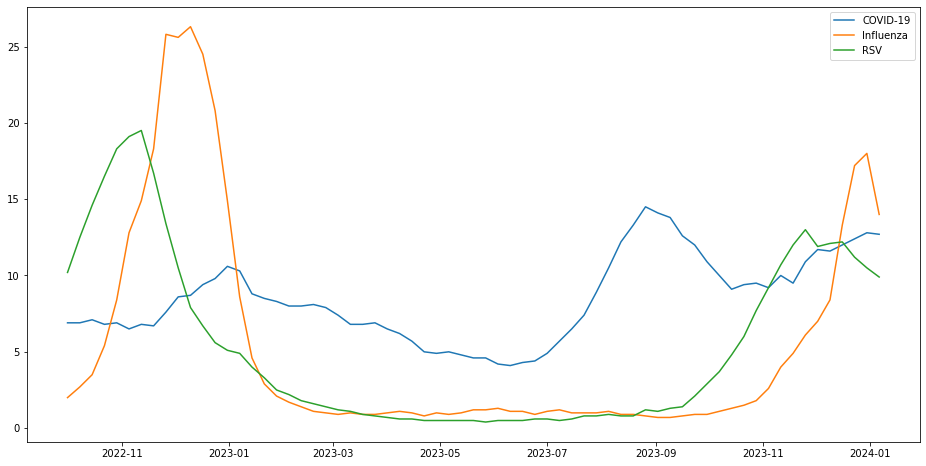

In [31]:
fix, ax= plt.subplots(figsize = (16,8))
ax.plot(test_data)
fig.autofmt_xdate()
plt.legend(['COVID-19','Influenza', 'RSV'], loc='upper right')